In [1]:
import pyradex
import os
os.environ['RADEX_DATAPATH'] = '/orange/adamginsburg/repos/pyradex/lamda/'
import numpy as np
import matplotlib.pyplot as plt
from astroquery.lamda import Lamda

In [2]:
ls /orange/adamginsburg/repos/pyradex/lamda/

ch3oh_a.dat  co.dat  nacl.dat  ph2co-h2.dat  sio-h2.dat


In [3]:
# pyradex.Radex?
# This does not tell me what the units should be of density or column density. Temperature is in K.
# Column density is in cm^{-2} and density is in cm^{-3}.

In [4]:
# Get methanol A species results for given column, density, and temperature
set_column = 1e14
set_density = 1e5
set_temp = 50
rr = pyradex.Radex(species='ch3oh_a', column=set_column, density=set_density, temperature=set_temp)
tbl = rr()

/blue/adamginsburg/abulatek/miniconda3/lib/python3.9/site-packages/pyradex-0.4.2.dev0-py3.9.egg/pyradex/core.py:542: UserWarning: Using a default ortho-to-para ratio (which will only affect species for which independent ortho & para collision rates are given)
  warnings.warn("Using a default ortho-to-para ratio (which "
/blue/adamginsburg/abulatek/miniconda3/lib/python3.9/site-packages/pyradex-0.4.2.dev0-py3.9.egg/pyradex/core.py:968: RuntimeWarning: invalid value encountered in true_divide
  frac_level_diff = level_diff/self.level_population
/blue/adamginsburg/abulatek/miniconda3/lib/python3.9/site-packages/pyradex-0.4.2.dev0-py3.9.egg/pyradex/core.py:1056: RuntimeWarning: overflow encountered in exp
  bnutex = thc*xt/(np.exp(earg)-1.0)


In [5]:
# rr?

In [6]:
# Which line is the dasar line?
np.argmax((tbl['upperlevel'] == b'3_1   ') & (tbl['lowerlevel'] == b'4_0   '))

62

In [7]:
tbl[62]

Tex,tau,frequency,upperstateenergy,upperlevel,lowerlevel,upperlevelpop,lowerlevelpop,brightness,T_B
K,,GHz,K,,,,,erg / (cm2 Hz s sr),K
float64,float64,float64,float64,bytes6,bytes6,float64,float64,float64,float64
1.3046936795972943,0.3458920073168159,107.013831,28.3,3_1,4_0,0.0027329811516297064,0.17991856934978337,-8.458739164652115e-16,-0.24041077989339263


### Check that I can reproduce what Christian sent

In [8]:
density = 1e5
rslts = rr(density={'H2':density}, column=set_column, temperature=set_temp)[62]['Tex', 'tau', 'T_B']
tex = rslts['Tex']
tau = rslts['tau']
T_B = rslts['T_B']
print(tex)
print(tau)
print(T_B)

1.3046936795972943
0.3458920073168159
-0.24041077989339263


### Plot excitation temperature as a function of density

In [9]:
densities = np.logspace(2, 7, 50)
rslts1 = [rr(density={'H2':dens}, column=set_column, temperature=set_temp)[62]['Tex', 'tau', 'T_B'] for dens in densities]

In [10]:
tex1 = [r['Tex'] for r in rslts1]
tau1 = [r['tau'] for r in rslts1]
T_B1 = [r['T_B'] for r in rslts1]

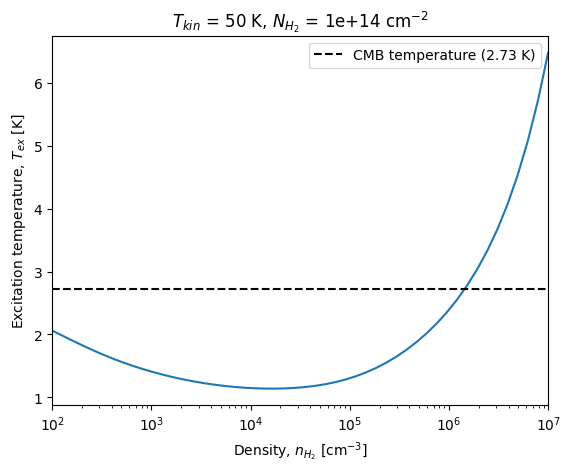

In [11]:
plt.semilogx(densities, tex1, color = 'tab:blue')
plt.axhline(2.73, color = 'k', linestyle = '--', label = "CMB temperature (2.73 K)")
plt.xlabel("Density, $n_{H_2}$ [cm$^{-3}$]")
plt.ylabel("Excitation temperature, $T_{ex}$ [K]")
plt.title(f"$T_{{kin}}$ = {set_temp} K, $N_{{H_2}}$ = {set_column:.0e} cm$^{{-2}}$")
plt.xlim(min(densities), max(densities))
plt.legend()
plt.savefig('632e0742965a6e88270d73d7/figures/Tex_vs_density_Tk_50K_NH2_1e14.pdf', bbox_inches = 'tight')
plt.savefig('632e0742965a6e88270d73d7/figures/Tex_vs_density_Tk_50K_NH2_1e14.png', dpi = 200, bbox_inches = 'tight')
plt.show()

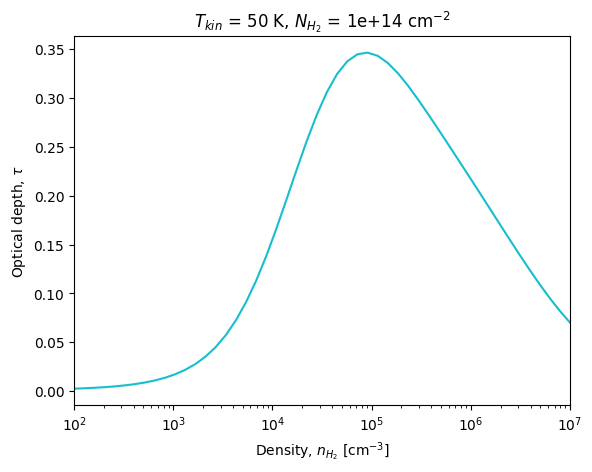

In [12]:
plt.semilogx(densities, tau1, color = 'tab:cyan')
plt.xlabel("Density, $n_{H_2}$ [cm$^{-3}$]")
plt.ylabel(r"Optical depth, $\tau$")
plt.title(f"$T_{{kin}}$ = {set_temp} K, $N_{{H_2}}$ = {set_column:.0e} cm$^{{-2}}$")
plt.xlim(min(densities), max(densities))
plt.savefig('632e0742965a6e88270d73d7/figures/tau_vs_density_Tk_50K_NH2_1e14.pdf', bbox_inches = 'tight')
plt.savefig('632e0742965a6e88270d73d7/figures/tau_vs_density_Tk_50K_NH2_1e14.png', dpi = 200, bbox_inches = 'tight')
plt.show()

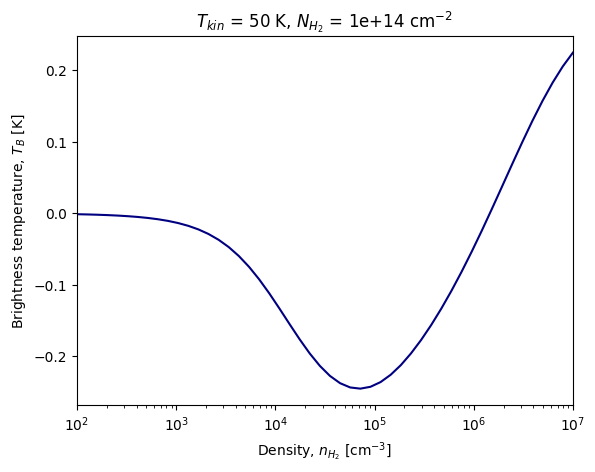

In [13]:
plt.semilogx(densities, T_B1, color = 'navy')
plt.xlabel("Density, $n_{H_2}$ [cm$^{-3}$]")
plt.ylabel("Brightness temperature, $T_{B}$ [K]")
plt.title(f"$T_{{kin}}$ = {set_temp} K, $N_{{H_2}}$ = {set_column:.0e} cm$^{{-2}}$")
plt.xlim(min(densities), max(densities))
plt.savefig('632e0742965a6e88270d73d7/figures/T_B_vs_density_Tk_50K_NH2_1e14.pdf', bbox_inches = 'tight')
plt.savefig('632e0742965a6e88270d73d7/figures/T_B_vs_density_Tk_50K_NH2_1e14.png', dpi = 200, bbox_inches = 'tight')
plt.show()

### Plot excitation temperature as a function of column density

In [15]:
coldensities = np.logspace(12, 16, 50) # Was 16.5
rslts2 = [rr(column=coldens, density={'H2':set_density}, temperature=set_temp)[62]['Tex', 'tau', 'T_B'] for coldens in coldensities]

In [16]:
tex2 = [r['Tex'] for r in rslts2]
tau2 = [r['tau'] for r in rslts2]
T_B2 = [r['T_B'] for r in rslts2]

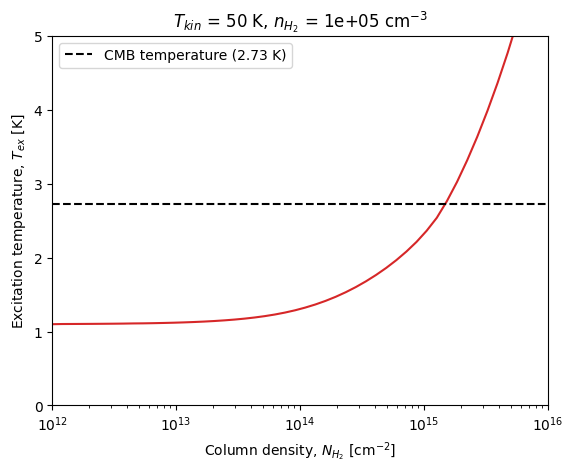

In [17]:
plt.semilogx(coldensities, tex2, color = 'tab:red')
plt.axhline(2.73, color = 'k', linestyle = '--', label = "CMB temperature (2.73 K)")
plt.xlabel("Column density, $N_{H_2}$ [cm$^{-2}$]")
plt.ylabel("Excitation temperature, $T_{ex}$ [K]")
plt.title(f"$T_{{kin}}$ = {set_temp} K, $n_{{H_2}}$ = {set_density:.0e} cm$^{{-3}}$")
plt.xlim(min(coldensities), max(coldensities))
plt.ylim(0, 5)
plt.legend()
plt.savefig('632e0742965a6e88270d73d7/figures/Tex_vs_coldens_Tk_50K_nH2_1e5.pdf', bbox_inches = 'tight')
plt.savefig('632e0742965a6e88270d73d7/figures/Tex_vs_coldens_Tk_50K_nH2_1e5.png', dpi = 200, bbox_inches = 'tight')
plt.show()

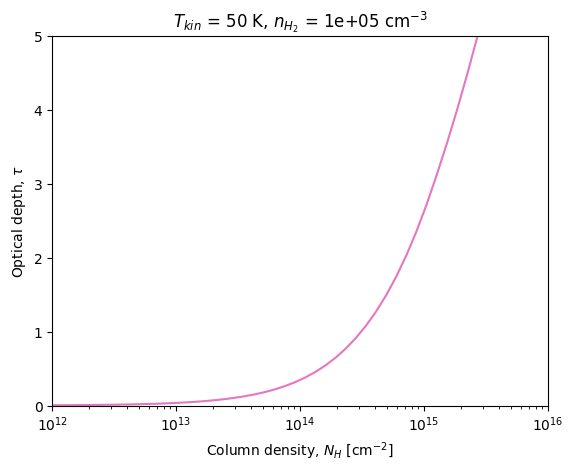

In [18]:
plt.semilogx(coldensities, tau2, color = 'tab:pink')
plt.xlabel("Column density, $N_H$ [cm$^{-2}$]")
plt.ylabel(r"Optical depth, $\tau$")
plt.title(f"$T_{{kin}}$ = {set_temp} K, $n_{{H_2}}$ = {set_density:.0e} cm$^{{-3}}$")
plt.xlim(min(coldensities), max(coldensities))
plt.ylim(0, 5)
plt.savefig('632e0742965a6e88270d73d7/figures/tau_vs_coldens_Tk_50K_nH2_1e5.pdf', bbox_inches = 'tight')
plt.savefig('632e0742965a6e88270d73d7/figures/tau_vs_coldens_Tk_50K_nH2_1e5.png', dpi = 200, bbox_inches = 'tight')
plt.show()

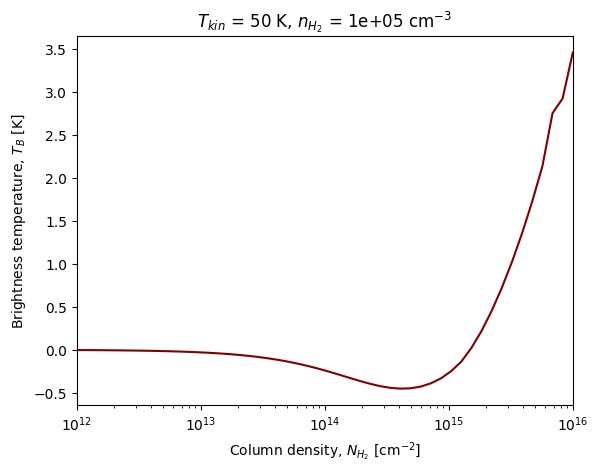

In [19]:
plt.semilogx(coldensities, T_B2, color = 'maroon')
plt.xlabel("Column density, $N_{H_2}$ [cm$^{-2}$]")
plt.ylabel("Brightness temperature, $T_{B}$ [K]")
plt.title(f"$T_{{kin}}$ = {set_temp} K, $n_{{H_2}}$ = {set_density:.0e} cm$^{{-3}}$")
plt.xlim(min(coldensities), max(coldensities))
plt.savefig('632e0742965a6e88270d73d7/figures/T_B_vs_coldens_Tk_50K_nH2_1e5.pdf', bbox_inches = 'tight')
plt.savefig('632e0742965a6e88270d73d7/figures/T_B_vs_coldens_Tk_50K_nH2_1e5.png', dpi = 200, bbox_inches = 'tight')
plt.show()

### Plot excitation temperature as a function of temperature

In [21]:
temps = np.linspace(2.73, 200, 300)
rslts3 = [rr(temperature=temp, density={'H2':set_density}, column=set_column)[62]['Tex', 'tau', 'T_B'] for temp in temps]

In [22]:
tex3 = [r['Tex'] for r in rslts3]
tau3 = [r['tau'] for r in rslts3]
T_B3 = [r['T_B'] for r in rslts3]

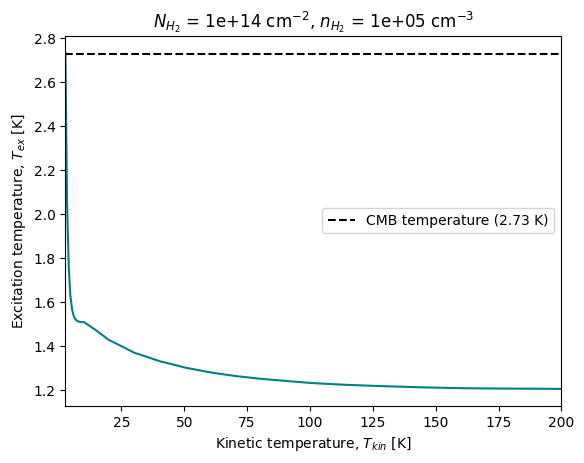

In [23]:
plt.plot(temps, tex3, color = 'teal')
plt.axhline(2.73, color = 'k', linestyle = '--', label = "CMB temperature (2.73 K)")
plt.xlabel("Kinetic temperature, $T_{kin}$ [K]")
plt.ylabel("Excitation temperature, $T_{ex}$ [K]")
plt.title(f"$N_{{H_2}}$ = {set_column:.0e} cm$^{{-2}}$, $n_{{H_2}}$ = {set_density:.0e} cm$^{{-3}}$")
plt.xlim(min(temps), max(temps))
plt.legend()
plt.savefig('632e0742965a6e88270d73d7/figures/Tex_vs_Tk_NH2_1e14_nH2_1e5.pdf', bbox_inches = 'tight')
plt.savefig('632e0742965a6e88270d73d7/figures/Tex_vs_Tk_NH2_1e14_nH2_1e5.png', dpi = 200, bbox_inches = 'tight')
plt.show()

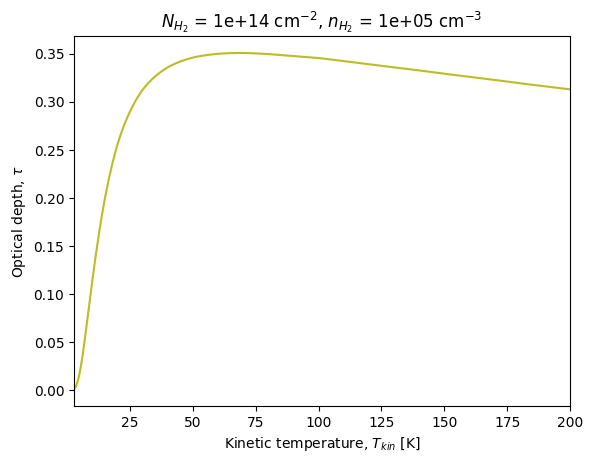

In [24]:
plt.plot(temps, tau3, color = 'tab:olive')
plt.xlabel("Kinetic temperature, $T_{kin}$ [K]")
plt.ylabel(r"Optical depth, $\tau$")
plt.title(f"$N_{{H_2}}$ = {set_column:.0e} cm$^{{-2}}$, $n_{{H_2}}$ = {set_density:.0e} cm$^{{-3}}$")
plt.xlim(min(temps), max(temps))
plt.savefig('632e0742965a6e88270d73d7/figures/tau_vs_Tk_NH2_1e14_nH2_1e5.pdf', bbox_inches = 'tight')
plt.savefig('632e0742965a6e88270d73d7/figures/tau_vs_Tk_NH2_1e14_nH2_1e5.png', dpi = 200, bbox_inches = 'tight')
plt.show()

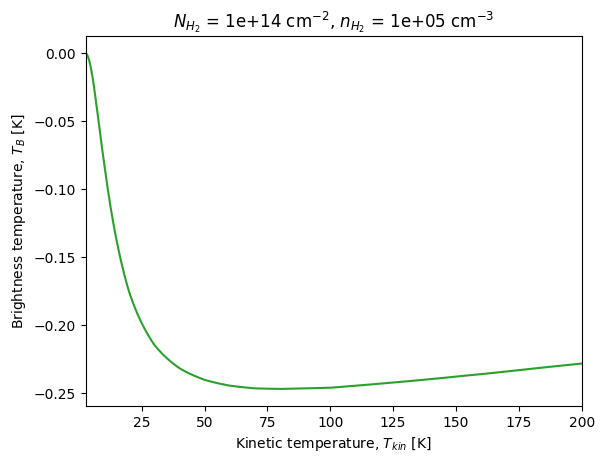

In [25]:
plt.plot(temps, T_B3, color = 'tab:green')
plt.xlabel("Kinetic temperature, $T_{kin}$ [K]")
plt.ylabel("Brightness temperature, $T_{B}$ [K]")
plt.title(f"$N_{{H_2}}$ = {set_column:.0e} cm$^{{-2}}$, $n_{{H_2}}$ = {set_density:.0e} cm$^{{-3}}$")
plt.xlim(min(temps), max(temps))
plt.savefig('632e0742965a6e88270d73d7/figures/T_B_vs_Tk_NH2_1e14_nH2_1e5.pdf', bbox_inches = 'tight')
plt.savefig('632e0742965a6e88270d73d7/figures/T_B_vs_Tk_NH2_1e14_nH2_1e5.png', dpi = 200, bbox_inches = 'tight')
plt.show()

In [26]:
# R = pyradex.Radex(collider_densities={'oH2':900,'pH2':100}, column=1e16, species='co', temperature=20)
# Tlvg = R(escapeProbGeom='lvg')
# Tslab = R(escapeProbGeom='slab')
# Tsphere = R(escapeProbGeom='sphere')
# Tlvg[:3].pprint()
# Tslab[:3].pprint()
# Tsphere[:3].pprint()

### Plot everything together (for symposium presentation fall 2022)

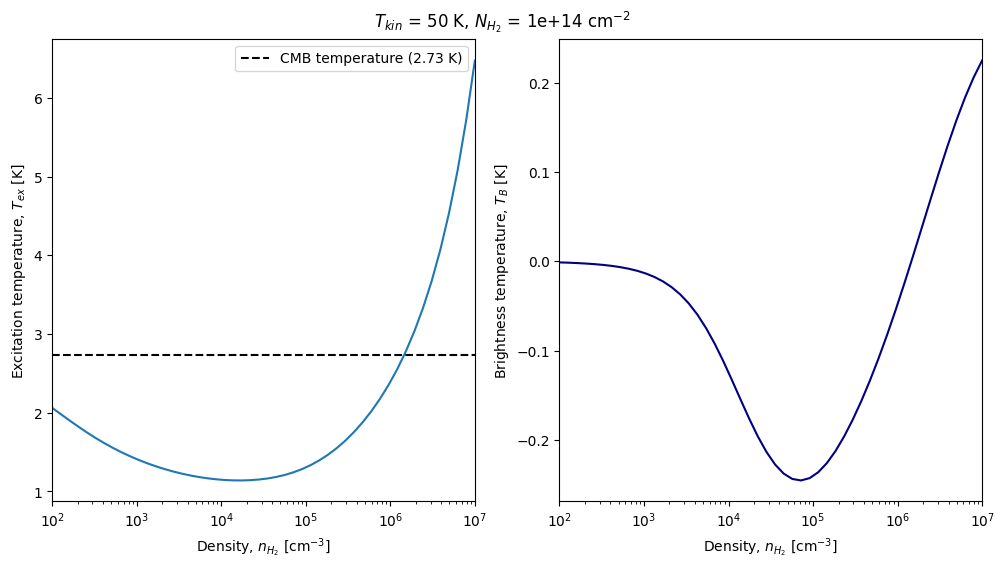

In [27]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 6))
ax1.semilogx(densities, tex1, color = 'tab:blue')
ax1.axhline(2.73, color = 'k', linestyle = '--', label = "CMB temperature (2.73 K)")
ax1.set_xlabel("Density, $n_{H_2}$ [cm$^{-3}$]")
ax1.set_ylabel("Excitation temperature, $T_{ex}$ [K]")
ax1.set_xlim(min(densities), max(densities))
ax1.legend()

ax2.semilogx(densities, T_B1, color = 'navy')
ax2.set_xlabel("Density, $n_{H_2}$ [cm$^{-3}$]")
ax2.set_ylabel("Brightness temperature, $T_{B}$ [K]")
ax2.set_xlim(min(densities), max(densities))

plt.suptitle(f"$T_{{kin}}$ = {set_temp} K, $N_{{H_2}}$ = {set_column:.0e} cm$^{{-2}}$", y = 0.93)
plt.savefig('632e0742965a6e88270d73d7/figures/observables_vs_density.pdf', bbox_inches = 'tight')
plt.savefig('632e0742965a6e88270d73d7/figures/observables_vs_density.png', dpi = 200, bbox_inches = 'tight')
plt.show()

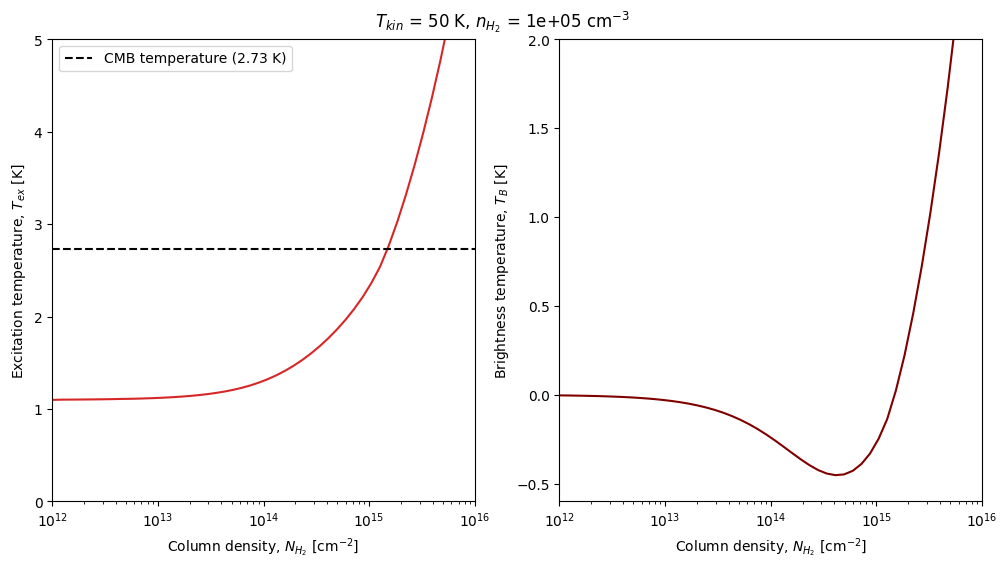

In [28]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 6))
ax1.semilogx(coldensities, tex2, color = 'tab:red')
ax1.axhline(2.73, color = 'k', linestyle = '--', label = "CMB temperature (2.73 K)")
ax1.set_xlabel("Column density, $N_{H_2}$ [cm$^{-2}$]")
ax1.set_ylabel("Excitation temperature, $T_{ex}$ [K]")
ax1.set_xlim(min(coldensities), max(coldensities))
ax1.set_ylim(0, 5)
ax1.legend()

ax2.semilogx(coldensities, T_B2, color = 'maroon')
ax2.set_xlabel("Column density, $N_{H_2}$ [cm$^{-2}$]")
ax2.set_ylabel("Brightness temperature, $T_{B}$ [K]")
ax2.set_xlim(min(coldensities), max(coldensities))
ax2.set_ylim(-0.6, 2)

plt.suptitle(f"$T_{{kin}}$ = {set_temp} K, $n_{{H_2}}$ = {set_density:.0e} cm$^{{-3}}$", y = 0.93)
plt.savefig('632e0742965a6e88270d73d7/figures/observables_vs_coldens.pdf', bbox_inches = 'tight')
plt.savefig('632e0742965a6e88270d73d7/figures/observables_vs_coldens.png', dpi = 200, bbox_inches = 'tight')
plt.show()

### This is for the paper

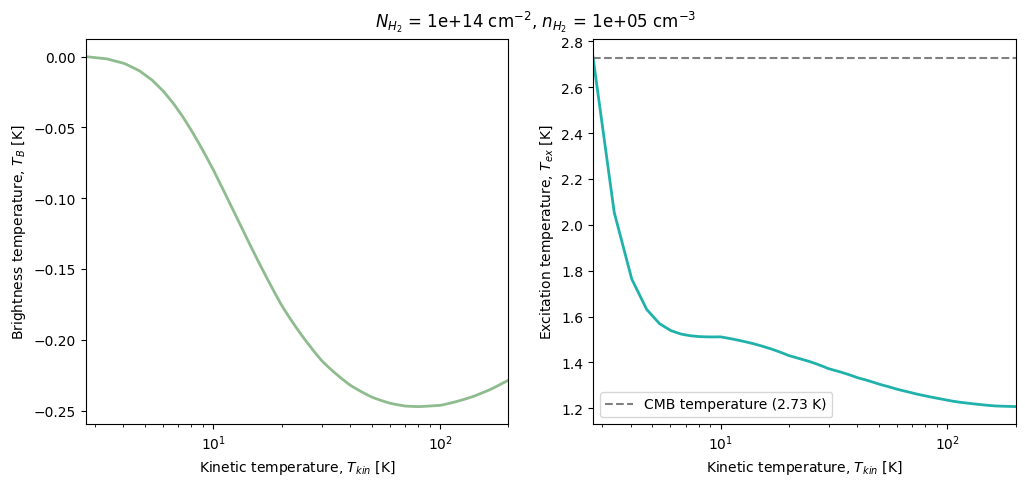

In [29]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 5))
ax1.semilogx(temps, T_B3, color = 'darkseagreen', linewidth = 2)
ax1.set_xlabel("Kinetic temperature, $T_{kin}$ [K]")
ax1.set_ylabel("Brightness temperature, $T_{B}$ [K]")
ax1.set_xlim(min(temps), max(temps))

ax2.semilogx(temps, tex3, color = 'lightseagreen', linewidth = 2)
ax2.axhline(2.73, color = 'grey', linestyle = '--', label = "CMB temperature (2.73 K)")
ax2.set_xlabel("Kinetic temperature, $T_{kin}$ [K]")
ax2.set_ylabel("Excitation temperature, $T_{ex}$ [K]")
ax2.set_xlim(min(temps), max(temps))
ax2.legend()

plt.suptitle(f"$N_{{H_2}}$ = {set_column:.0e} cm$^{{-2}}$, $n_{{H_2}}$ = {set_density:.0e} cm$^{{-3}}$", y = 0.94)
plt.savefig('632e0742965a6e88270d73d7/figures/observables_vs_Tk.pdf', bbox_inches = 'tight')
plt.savefig('632e0742965a6e88270d73d7/figures/observables_vs_Tk.png', dpi = 200, bbox_inches = 'tight')
plt.show()

In [30]:
# At what T_kin does T_ex go below 2 K?
print(np.array(tex3), np.array(temps))

[2.73384144 2.05391778 1.76366552 1.6316804  1.56897625 1.53856587
 1.52355191 1.51619474 1.51273764 1.51134982 1.51107226 1.51140149
 1.50662474 1.50173058 1.49677407 1.49173644 1.486604   1.48137703
 1.47605658 1.47064592 1.46514738 1.45956365 1.45389713 1.44814987
 1.44232342 1.43641942 1.43043818 1.42647298 1.42291332 1.41931838
 1.41568669 1.41201811 1.40831266 1.40456995 1.40079003 1.39697278
 1.39311814 1.38922602 1.3852964  1.38132914 1.3773242  1.3732815
 1.37035006 1.36796634 1.36555929 1.36312902 1.36067555 1.35819894
 1.35569871 1.35317553 1.35062992 1.34806167 1.34547065 1.34285709
 1.34022113 1.33756287 1.33488243 1.33264029 1.33082397 1.32899368
 1.32714956 1.32529176 1.32342035 1.32153549 1.3196373  1.31772591
 1.31580142 1.31386396 1.31191363 1.30995054 1.30797422 1.30598598
 1.3042037  1.30281155 1.30141127 1.30000302 1.2985869  1.29716307
 1.29573163 1.2942927  1.29284654 1.29139298 1.28993227 1.28846449
 1.28698976 1.28550807 1.28401969 1.28260988 1.28155092 1.28048